**IMPORTING LIBRARIES**


In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms


**READING DATASET AND PERFORMING USER DEFINED HISTOGRAM EQUALISATION**

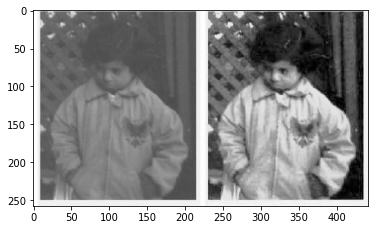

In [62]:
# using inbuilt function for opencv

img = cv2.imread('pout-dark.jpg' ,0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(res, cmap = 'gray')
plt.show()


**CODE FOR USER DEFINED HISTOGRAM PLOTING (RED) INCLUDING CDF(BLUE) OF IT**

In [63]:
def histogram(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    plt.plot(cdf_normalized, color='b')
    plt.hist(img.flatten(), 256, [0, 256], color='r')
    plt.xlim([0, 256])
    plt.legend(('cdf', 'histogram'), loc='upper left')
    plt.show()


**USER DEFINED HISTOGRAM EQUALISATION**

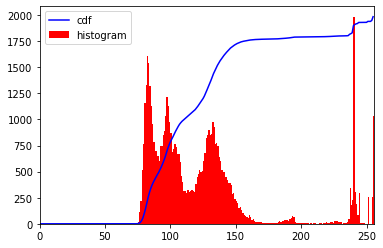

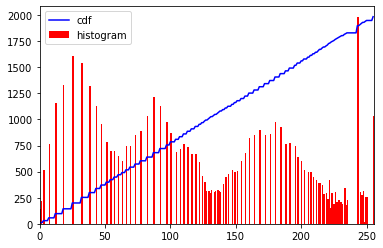

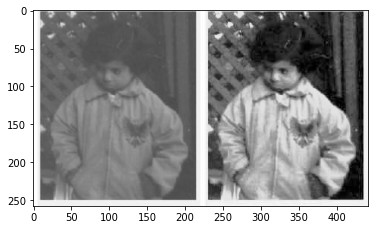

In [64]:
# using userdefined function hist equlisation


def histeq(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    histogram(img)
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    img2 = cdf[img]
    hist, bins = np.histogram(img2.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    histogram(img2)
    return img2


img2 = histeq(img)
res = np.hstack((img,img2)) #stacking images side-by-side
plt.imshow(res, cmap = 'gray')

 


**INBULT FUNCTION FOR HISTOGRAM MATCHING**

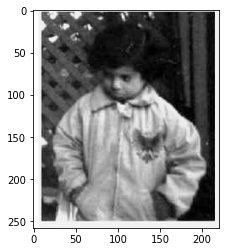

In [65]:
# lets perform histogram matching using inbuilt function

img = cv2.imread('pout-dark.jpg' ,0)
ref_image = cv2.imread('pout-bright.jpg' ,0)
matched = match_histograms(img, ref_image, channel_axis= None)
plt.imshow(matched , cmap = 'gray')
plt.show()


**CODE FOR USER DEFINED HISTOGRAM MATCHING AND INCLUDING HISOGRAM PLOT**

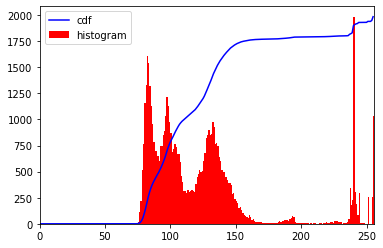

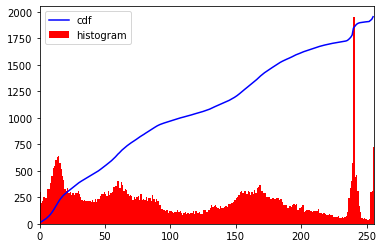

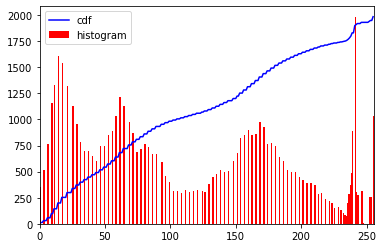

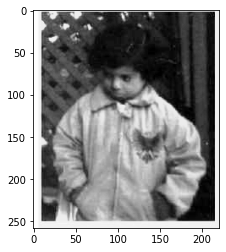

In [66]:
import numpy as np
import matplotlib.pyplot as plt


def histmatch(img, ref_image):
    # Calculate the histograms of the input images
    img_hist, _ = np.histogram(img, bins=256, range=(0, 255))
    histogram(img)
    ref_hist, _ = np.histogram(ref_image, bins=256, range=(0, 255))
    histogram(ref_image)

    # Normalize the histograms
    img_hist = img_hist / img_hist.sum()
    ref_hist = ref_hist / ref_hist.sum()

    # Calculate the cumulative distribution functions (CDFs)
    img_cdf = np.cumsum(img_hist)
    ref_cdf = np.cumsum(ref_hist)

    # Create a look-up table (LUT) to map the intensities of the image to the intensities of the reference image
    lut = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        lut[i] = (np.abs(ref_cdf - img_cdf[i])).argmin()

    # Apply the LUT to the input image to get the histogram-matched image
    matched_img = lut[img]
    histogram(matched_img)

    

    return matched_img


matched_user = histmatch(img,ref_image)
plt.imshow(matched_user , cmap = 'gray')
plt.show()